In [1]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html
from os.path import join

import numpy as np
import pywt

from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
# Read image and convert to grayscale
A = imread(join('..', 'DATA', 'dog.jpg')).mean(axis=2)

## Wavelet decomposition (2 level)
coeffs = pywt.wavedec2(A, wavelet='db1', level=2)

# Normalize each coefficient array (first element is a single array, others are tuples of arrays)
coeffs = [coeffs[0] / abs(coeffs[0]).max()] + [
    tuple(d / abs(d).max() for d in coeff)
    for coeff in coeffs[1:]
]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)

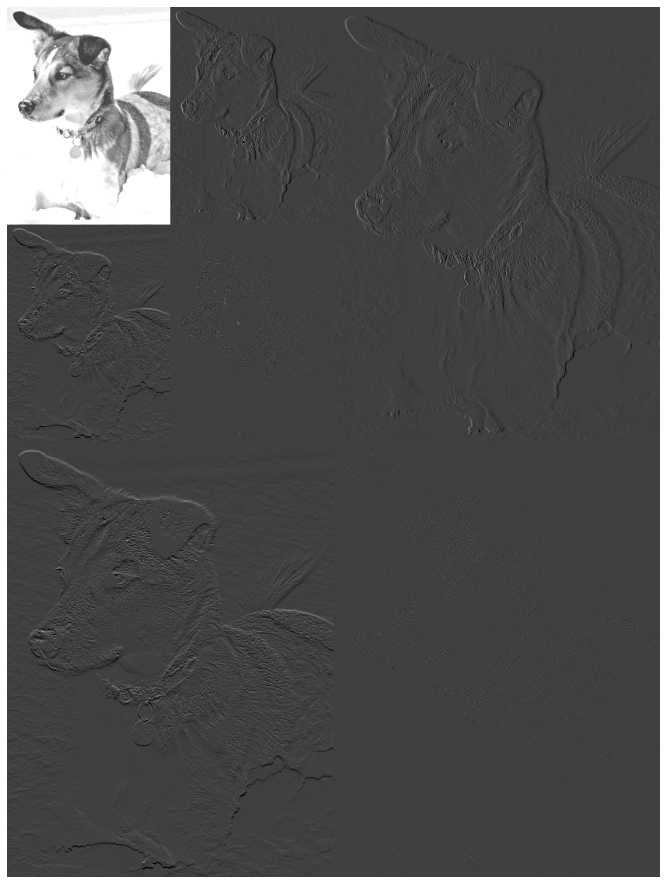

In [3]:
fig, ax = plt.subplots(figsize=(12, 16))
ax.imshow(arr, cmap='gray', vmin=-0.25, vmax=0.75)
ax.axis(False);